# **HDS5210-2024 Final Project**

# **Air Quality and Lung Cancer Mortality in the United Kingdom**

# Objective

Examining the effects of air pollution and a low Air Quality Index on lung cancer mortality both globally and in the UK, adding value to existing research by identifying and proving another important factor, while conducting analysis.

# Purpose

The primary purpose of this research is to comprehensively investigate and quantify the causal relationship between air quality parameters and lung cancer mortality rates across the United Kingdom, with the ultimate goal of:

1. Establishing a robust scientific linkage between environmental air quality indicators and lung cancer mortality

2. Trying to provide insights for environmental regulation professionals


# Key strengths of this project

1. Longitudinal data collection
2. Multi-regional analysis
3. Applying all techniques learned in this class
4. Consideration of potential confounding factors
5. Ethical data handling

# Introduction

Air pollution has emerged as a critical public health concern in the 21st century, with growing evidence linking environmental factors to significant health outcomes. The United Kingdom, with its complex industrial history, urban development, and diverse geographical landscapes, presents a unique context for investigating the intricate relationship between air quality and lung cancer mortality.




The Institute for Health Metrics and Evaluation (IHME), in its Global Burden of Disease study, provides estimates of the number of deaths attributed to the range of risk factors for disease.

Research Paper: https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30752-2/fulltext

In [4]:
from IPython.display import IFrame
from IPython.core.display import display

display(IFrame('https://ourworldindata.org/grapher/number-of-deaths-by-risk-factor', '100%', '600px'))

Air pollution is responsible for millions of deaths each year

## Contextual background

The United Kingdom has undergone significant environmental transformations over the past decades. Historically characterized by heavy industrial activity, particularly in regions like Manchester, Birmingham, and parts of Scotland, the nation has experienced substantial changes in its environmental and industrial practices. Despite progressive environmental regulations and technological advancements, air quality remains a persistent challenge.



## Epidemiological significance

Lung cancer represents a critical health issue in the UK, with substantial mortality rates influenced by multiple factors. While tobacco consumption has long been recognized as the primary risk factor, emerging research increasingly highlights environmental exposures, particularly air pollution, as significant contributors to lung cancer development and mortality.

# Existing research

I found a research paper titled "The Efficacy of Machine Learning Models in Lung Cancer Risk Prediction with Explainability," where the authors' main objective was to provide logical explanations for why the model made certain decisions to build trust. However, they performed limited data analysis to explain the results, and they have provided me with the dataset. I want to add value to this research by conducting a more thorough data analysis, as the authors identified air pollution as one of the contributors to the model. My goal is to prove this connection.

https://pmc.ncbi.nlm.nih.gov/articles/PMC11175504/

# Data Links

- [Dataset 1 Link](https://www.kaggle.com/datasets/azminetoushikwasi/aqi-air-quality-index-scheduled-daily-update)

- [Dataset 2 data.world Link](https://data.world/cancerdatahp/lung-cancer-data) or [Dataset 2 Kaggle Link](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer) or [Dataset 2 website Link](https://pmc.ncbi.nlm.nih.gov/articles/PMC11175504/)

- [Dataset 3 Link](https://digital.nhs.uk/data-and-information/publications/statistical/compendium-mortality/current/mortality-from-lung-cancer)


# About datasets

- First dataset : The Air Quality Index (AQI) is used for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern for you. This dataset is from kaggle and contains Air Quality Index of most the countries of the world. The format is "xlsx".

- Second dataset : This dataset is from the aforementioned research paper and this related to lung cancer which includes details on the relation between lung cancer and air pollution. The format is "csv".

- Third dataset : This dataset is from the NHS UK website and provides information on lung cancer mortality, including crude death rates categorized by age groups. The data is from the UK. The format is "xls".

# Data loading and pre-processing

Data pre-processing encompasses aspects such as assessing, reviewing and inspecting data with the aim of obtaining statistic regarding the quality is referred to as data profiling and processing. It starts with dissecting the attributes of the current data; the data sets the pertinent to the matter under consideration lists its features and then the participants guess which of these attributes could be applicable to the suggested analytics activity. Regarding this project, the data collected, the participants were patients diagnosed with lung disease and the data included in the set includes patient information, occupation, active smoker status, and main symptoms they encounter when having lung cancer. It’s at this stage of data pre-processing that we get a rather vague insight as well as comprehension concerning the topic but the data is still dirty. Scattered visions or presumptions about statistics, half-baked decisions derived from such insights, and broad skepticism of the analytical process are all bound to be caused by dirty data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cancer = pd.read_csv('Dataset2.csv')
AQI = pd.read_excel("Dataset3.xlsx")
# Use pd.read_excel() instead of pd.read_csv() since you are reading an Excel file (.xls)
dt = pd.read_excel('Dataset1.xls', sheet_name='Data')

In [7]:
cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [8]:
AQI.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [9]:
dt.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [11]:
AQI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12986 entries, 0 to 12985
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12986 non-null  datetime64[ns]
 1   Country    12986 non-null  object        
 2   Status     12986 non-null  object        
 3   AQI Value  12986 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 405.9+ KB


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   19 non-null     object 
 1   Unnamed: 1   12 non-null     object 
 2   Unnamed: 2   12 non-null     object 
 3   Unnamed: 3   17 non-null     object 
 4   Unnamed: 4   13 non-null     object 
 5   Unnamed: 5   12 non-null     object 
 6   Unnamed: 6   12 non-null     object 
 7   Unnamed: 7   12 non-null     object 
 8   Unnamed: 8   12 non-null     object 
 9   Unnamed: 9   12 non-null     object 
 10  Unnamed: 10  12 non-null     object 
 11  Unnamed: 11  13 non-null     object 
 12  Unnamed: 12  12 non-null     object 
 13  Unnamed: 13  12 non-null     object 
 14  Unnamed: 14  12 non-null     object 
 15  Unnamed: 15  12 non-null     object 
 16  Unnamed: 16  12 non-null     object 
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  12 non-null     object 
 19  Unnamed: 1

In [13]:
cancer.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [14]:
AQI.describe()

,Date,AQI Value
count,12986,12986.000000
mean,2022-10-24 09:26:11.846603776,61.940936
min,2022-07-21 00:00:00,1.000000
25%,2022-08-08 00:00:00,29.000000
50%,2022-08-30 00:00:00,53.000000
75%,2022-09-22 00:00:00,83.000000
max,2023-08-10 00:00:00,963.000000
std,NaN,48.481170


In [15]:
dt.describe()

,Unnamed: 17
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [16]:
dt.isnull().sum()

,0
Unnamed: 0,10
Unnamed: 1,17
Unnamed: 2,17
Unnamed: 3,12
Unnamed: 4,16
Unnamed: 5,17
Unnamed: 6,17
Unnamed: 7,17
Unnamed: 8,17
Unnamed: 9,17


In [17]:
AQI.duplicated().sum()

173

In [18]:
dt.duplicated().sum()

8

We need to clean the datasets to properly read the data



# Data Cleaning

In general, data cleansing is referred to as the process of fixing or eliminating, or standardizing data that is fairly wrong, poorly structured or formatted, repeated or only partially recorded. The first process which is undertaken for data cleansing data is dedualetion of data. Duplicate removal can be accomplished by eliminating redundant or irrelevant data and observations, or undesirable observations since the duplication of data mainly occurs during data collection. As indicated below, during this stage, null values or duplicated rows and values will then be detected, isolated as well as deleted from the raw dataset.

In [19]:
dt

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Return to Contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Compendium of population health indicators:,NaN,NaN,Mortality from lung cancer (ICD-10 C33 - C34):...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Statistic:,NaN,NaN,Crude rate,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
if 'Unnamed: 17' in dt.columns:
    dt = dt.drop(columns=['Unnamed: 17'])

In [21]:
AQI["Date"] = pd.to_datetime(AQI["Date"])

AQI["Year"] = AQI["Date"].dt.year
AQI["Month"] = AQI["Date"].dt.month
AQI["Day"] = AQI["Date"].dt.day

In [22]:
# Set row 17 (index 16 in Python's 0-based indexing) as column headers
data = pd.DataFrame(dt, columns=dt.keys())
data.columns = data.iloc[17]  # Row 17 as header
data = data.drop(index=17)  # Drop the original header row

data.reset_index(drop=True, inplace=True)

In [23]:
data = data.iloc[18:]  # Adjust the row and column indices as needed

In [24]:
new_column_names = ['Level', 'Code', 'ONS Code', 'Organisation Name', 'M1+', 'M01-04', 'M05-14', 'M15-34', 'M35-64', 'M65-74', 'M75+', 'F1+', 'F01-04', 'F05-14', 'F15-34', 'F35-64', 'F65-74', 'F75+', 'P1+', 'P01-04', 'P05-14', 'P15-34', 'P35-64', 'P65-74', 'P75+']
data.columns = new_column_names

In [25]:
save = data.copy()

In [26]:
columns = [
    "ORG_CODE", "NEW_CODE",
    "ORG_TITLE", "SEX_CODE", "AGE_BAND_CODE", "Rate"
]

# Reshape the data into the desired format
reshaped_data = []

for index, row in save.iterrows():
    org_code = row["Code"]
    new_code = row["ONS Code"]
    org_title = row["Organisation Name"]

    for prefix in ["M", "F", "P"]:
        for col in row.index:
            if col.startswith(prefix):  # Find columns matching the prefix
                age_band = col[1:]  # Remove the prefix (e.g., "M01-04" -> "01-04")
                rate = row[col]
                if pd.notnull(rate):  # Exclude NaN values
                    reshaped_data.append([
                        org_code, new_code,
                        org_title, prefix, age_band, rate
                    ])

# Create the final DataFrame
reshaped_df = pd.DataFrame(reshaped_data, columns=columns)
reshaped_df.head()

,ORG_CODE,NEW_CODE,ORG_TITLE,SEX_CODE,AGE_BAND_CODE,Rate
0,E&W,K04000001,England and Wales,M,1+,53.65
1,E&W,K04000001,England and Wales,M,01-04,0.12
2,E&W,K04000001,England and Wales,M,05-14,0.04
3,E&W,K04000001,England and Wales,M,15-34,0.17
4,E&W,K04000001,England and Wales,M,35-64,24.27


In [27]:
if 'Rate' in reshaped_df.columns:
    reshaped_df['Rate'] = reshaped_df['Rate'].astype(float)

In [28]:
data = reshaped_df.copy()

In [29]:
datauk = data[data['NEW_CODE'] == 'K04000001']

In [30]:
df = pd.concat([cancer, data, AQI], axis=1)

# General Analysis

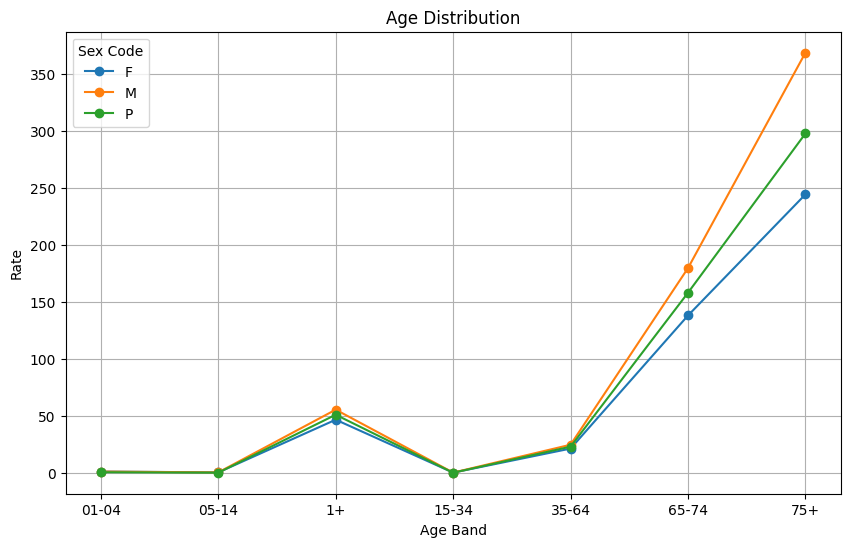

In [31]:
pivot1 = data.groupby(['AGE_BAND_CODE', 'SEX_CODE'])['Rate'].mean().unstack()

# Plot
pivot1.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Age Distribution')
plt.xlabel('Age Band')
plt.ylabel('Rate')
plt.grid(True)
plt.legend(title='Sex Code')
plt.show()

 The data mostly consist of participant of Age 35-75

## Status vs AQI Value

In [32]:
s = pd.DataFrame(AQI.groupby("Status").agg(
min_AQI=('AQI Value', "min"),
max_AQI=('AQI Value', "max")))

s.sort_values(by="min_AQI", ascending=True)

,min_AQI,max_AQI
Status,,
Good,1,50
Moderate,51,100
Unhealthy for Sensitive Groups,101,150
Unhealthy,151,200
Very Unhealthy,202,300
Hazardous,301,963


- GOOD: AQI value less than 50
- MODERATE: AQI value more than 50 but less than 100
- UNHEALTHY FOR SENSITIVE GROUPS: AQI value more than 100 but less than 150
- UNHEALTHY: AQI value more than 150 but less than 200
- VERY UNHEALTHY: AQI value more than 200 but less than 300
- HAZARDOUS: AQI value more than 400

<ipython-input-33-99522128e7d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(AQI, x='AQI Value', y='Status', inner='box', palette='Dark2')


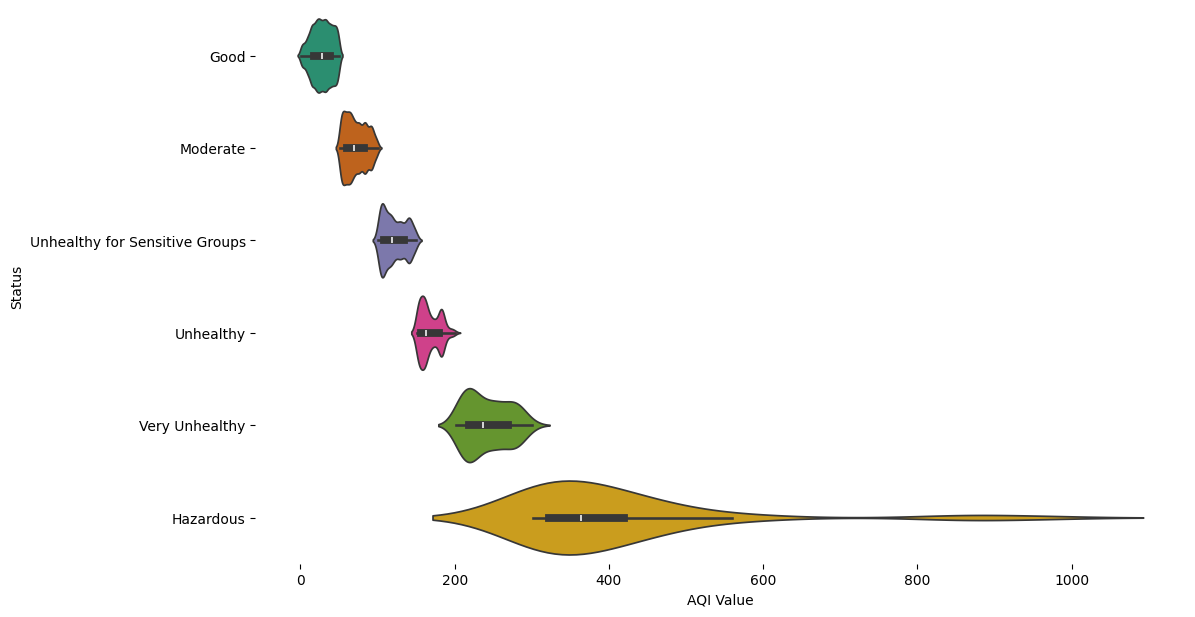

In [33]:
figsize = (12, 1.2 * len(AQI['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(AQI, x='AQI Value', y='Status', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Below 400 belongs to very unhealthy, unhealthy, unhealthy for sensitive group, moderate and good. AQI value more than 400 belongs to Hazardous status

## Status

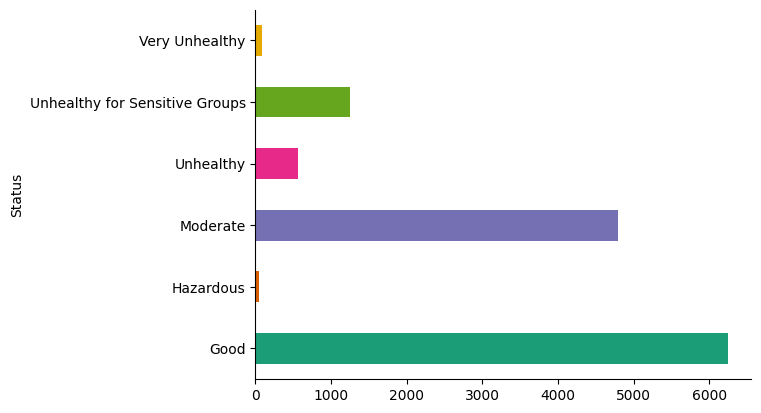

In [34]:
AQI.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

It highlighting which statuses are more common, "Very Unhealthy": This status appears to have a count of 1000. Moderate status appears to have a count of more than 4000 and highest belongs to Good statues.

In [35]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level', 'ORG_CODE', 'NEW_CODE', 'ORG_TITLE',
       'SEX_CODE', 'AGE_BAND_CODE', 'Rate', 'Date', 'Country', 'Status',
       'AQI Value', 'Year', 'Month', 'Day'],
      dtype='object')

## Air Quality Status

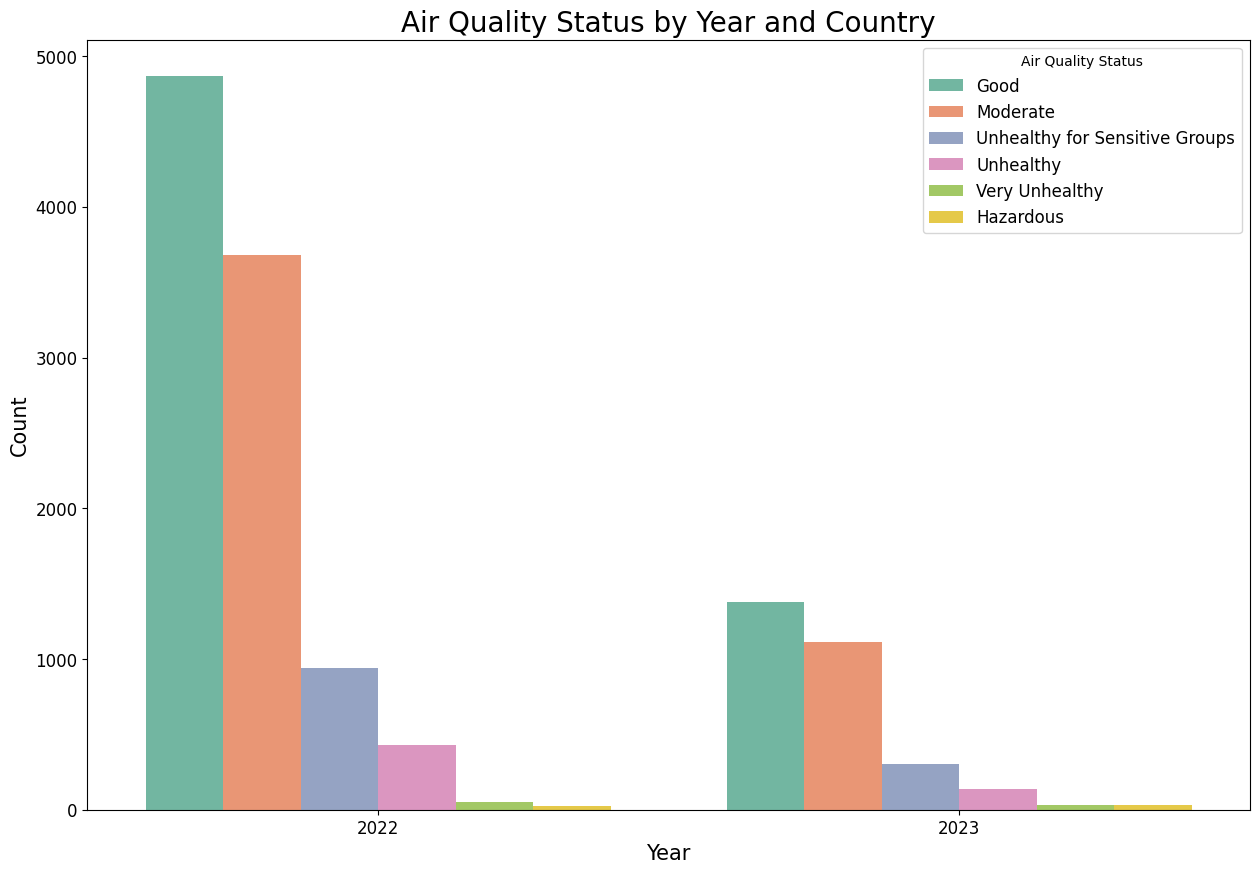

In [36]:
plt.figure(figsize=(15, 10))

# Create a count plot to show how each air quality status changes by year and country
sns.countplot(
    data= df,
    x="Year",  # Year on the x-axis
    hue="Status",  # Status of air quality (e.g., "Very Unhealthy", "Unhealthy for Sensitive Groups")
    palette="Set2",  # Choose a color palette for better visualization
    dodge=True  # Separate the bars by 'Status'
)

# Title and labels
plt.title("Air Quality Status by Year and Country", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Air Quality Status", fontsize=12)

# Show the plot
plt.show()

The difference detween good and moderate decreased from 2022 to 2023 so there is an increase in risk in some contries

## AQI Vs Severity

<ipython-input-37-144e0023c3ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


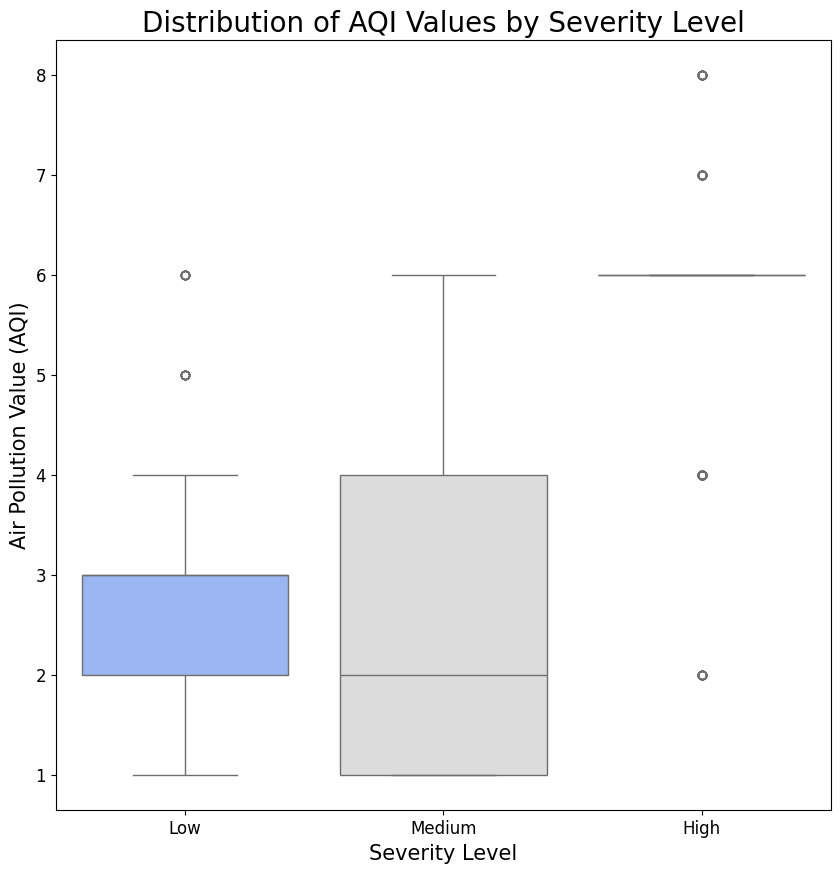

In [37]:
plt.figure(figsize=(10, 10))
sns.boxplot(
    data=df,
    x="Level",  # Pollution level on the x-axis
    y="Air Pollution",  # AQI values on the y-axis
    palette="coolwarm"  # Color palette
)

# Title and labels
plt.title("Distribution of AQI Values by Severity Level", fontsize=20)
plt.xlabel("Severity Level", fontsize=15)
plt.ylabel("Air Pollution Value (AQI)", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

<ipython-input-38-50bcd4a36eb1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


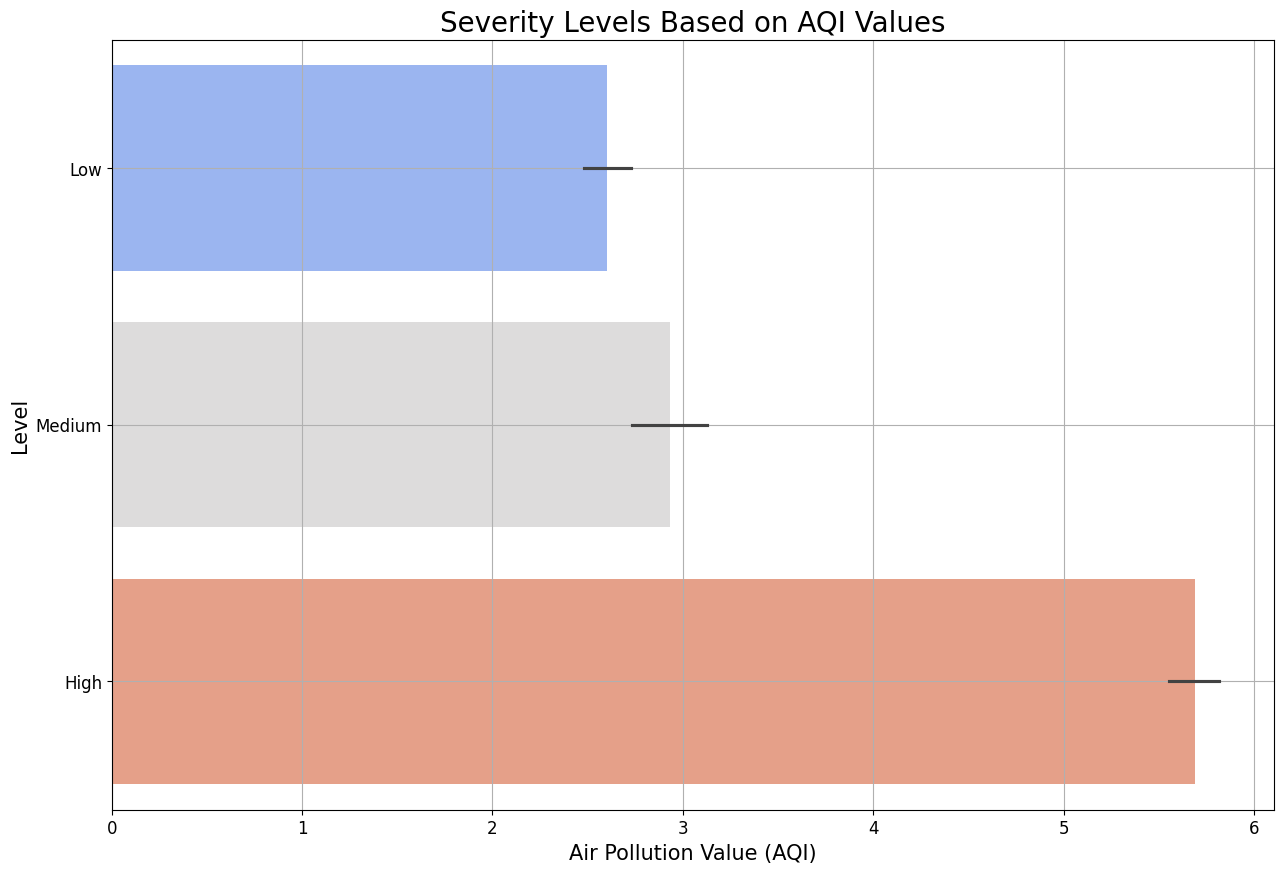

In [38]:
plt.figure(figsize=(15, 10))

# Create a bar plot to show air pollution levels across different pollution values
sns.barplot(
    data=df,
    x="Air Pollution",  # Air Pollution Value on the x-axis (e.g., AQI values)
    y="Level",  # The level of pollution (e.g., "Very Unhealthy", "Unhealthy for Sensitive Groups")
    palette="coolwarm"  # Use a color palette
)

# Title and labels
plt.title("Severity Levels Based on AQI Values", fontsize=20)
plt.xlabel("Air Pollution Value (AQI)", fontsize=15)
plt.ylabel("Level", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

We can understand that as the air pollution increases the severity level of lung cancer also increseaed .

## Correlation

<ipython-input-39-36418e4c8762>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Level_num'] = df['Level'].replace(level_mapping)


Correlation between 'Air Pollution' and 'Level':
               Air Pollution  Level_num
Air Pollution       1.000000   0.636038
Level_num           0.636038   1.000000


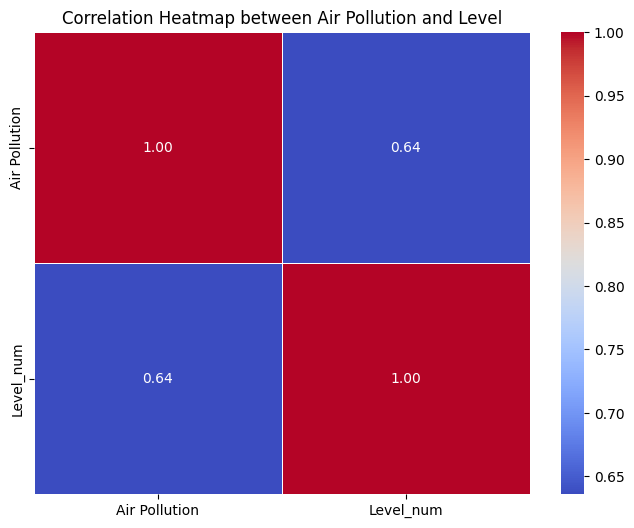

In [39]:
# Manually map 'Low', 'Medium', 'High' to 0, 1, 2
level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Apply the mapping to the 'Level' column
df['Level_num'] = df['Level'].replace(level_mapping)

# Step 2: Calculate correlation between 'Air Pollution' (AQI) and 'Level' (encoded)
correlation = df[['Air Pollution', 'Level_num']].corr(method='pearson')

# Print the correlation matrix
print("Correlation between 'Air Pollution' and 'Level':")
print(correlation)

# Step 3: Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap between Air Pollution and Level")
plt.show()

A very good correlation

## Smoking

Correlation:  Smoking       1.0       2.0       3.0       4.0       5.0       6.0       7.0  \
Smoking                                                                         
1.0      1.000000  0.091785  0.975768 -0.466312  0.861174  0.508310 -0.914538   
2.0      0.091785  1.000000  0.307445  0.838086 -0.427121  0.904194 -0.486733   
3.0      0.975768  0.307445  1.000000 -0.261450  0.729084  0.684424 -0.980885   
4.0     -0.466312  0.838086 -0.261450  1.000000 -0.851237  0.524781  0.068632   
5.0      0.861174 -0.427121  0.729084 -0.851237  1.000000  0.000000 -0.581966   
6.0      0.508310  0.904194  0.684424  0.524781  0.000000  1.000000 -0.813213   
7.0     -0.914538 -0.486733 -0.980885  0.068632 -0.581966 -0.813213  1.000000   
8.0     -0.807746 -0.661181 -0.917167 -0.144849 -0.395946 -0.918274  0.977179   

Smoking       8.0  
Smoking            
1.0     -0.807746  
2.0     -0.661181  
3.0     -0.917167  
4.0     -0.144849  
5.0     -0.395946  
6.0     -0.918274  
7.0      0.9771

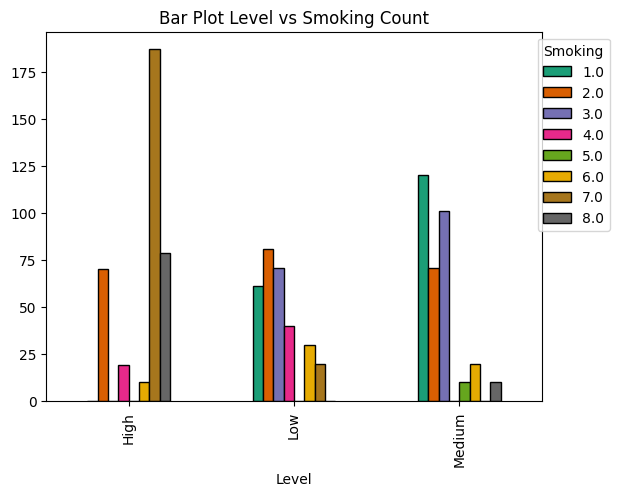

In [40]:
# Bar Plot for Level vs Smoking Count
a = pd.crosstab(df['Level'], df['Smoking'])
print("Correlation: ", a.corr(method='pearson'))
a.plot(kind='bar', stacked=False, colormap='Dark2', edgecolor='black')
plt.title('Bar Plot Level vs Smoking Count')
plt.legend(title='Smoking', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


Correlation:  Passive Smoker       1.0       2.0       3.0       4.0       5.0       6.0  \
Passive Smoker                                                               
1.0             1.000000  0.280506 -0.693375  0.126005  0.866025  0.000000   
2.0             0.280506  1.000000 -0.886143  0.987547  0.722852  0.959852   
3.0            -0.693375 -0.886143  1.000000 -0.802202 -0.960769 -0.720577   
4.0             0.126005  0.987547 -0.802202  1.000000  0.605138  0.992030   
5.0             0.866025  0.722852 -0.960769  0.605138  1.000000  0.500000   
6.0             0.000000  0.959852 -0.720577  0.992030  0.500000  1.000000   
7.0            -0.500000 -0.971510  0.970725 -0.922125 -0.866025 -0.866025   
8.0            -0.500000 -0.971510  0.970725 -0.922125 -0.866025 -0.866025   

Passive Smoker       7.0       8.0  
Passive Smoker                      
1.0            -0.500000 -0.500000  
2.0            -0.971510 -0.971510  
3.0             0.970725  0.970725  
4.0            -0.92

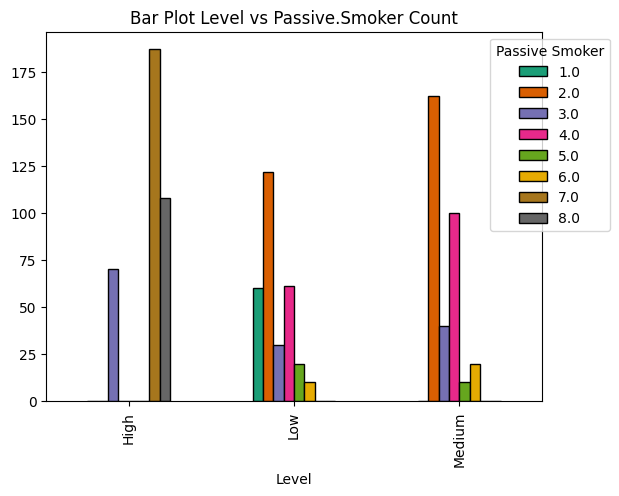

In [41]:
# Bar Plot for Level vs Passive.Smoker Count
b = pd.crosstab(df['Level'], df['Passive Smoker'])
print("Correlation: ", b.corr(method='pearson'))
b.plot(kind='bar', stacked=False, colormap='Dark2', edgecolor='black')
plt.title('Bar Plot Level vs Passive.Smoker Count')
plt.legend(title='Passive Smoker', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

Whether you're a passive smoker or a chain smoker, you are at a high risk of lung damage and lung cancer. The Correlation is also high between high levels of smoking and severity levels

# United Kingdom Analysis

In [42]:
data = save.copy()

In [43]:
data = data[data['ONS Code'] == 'K04000001']

In [44]:
data

,Level,Code,ONS Code,Organisation Name,M1+,M01-04,M05-14,M15-34,M35-64,M65-74,...,F35-64,F65-74,F75+,P1+,P01-04,P05-14,P15-34,P35-64,P65-74,P75+
18,National,E&W,K04000001,England and Wales,53.65,0.12,0.04,0.17,24.27,175.89,...,20.49,134.72,237.03,49.24,0.06,0.02,0.16,22.36,154.54,289.78


In [45]:
AQI = AQI[AQI['Country'] == 'United Kingdom of Great Britain and Northern Ireland']

From this data We can say that the entire dataset is based on United Kingdom and it's islands, So let's take AQI from the UK itself and proceed with the Our analysis.
And since in AQI dataset "**United Kingdom of Great Britain and Northern Ireland**" Ireland was also there let's take drom data mortality set "**England and Wales**"

And for the lung cancer data 'Code' is 'K04000001 for United Kingdom

In [46]:
AQI['Status'].unique()

array(['Moderate', 'Good', 'Very Unhealthy'], dtype=object)

## AQI Values

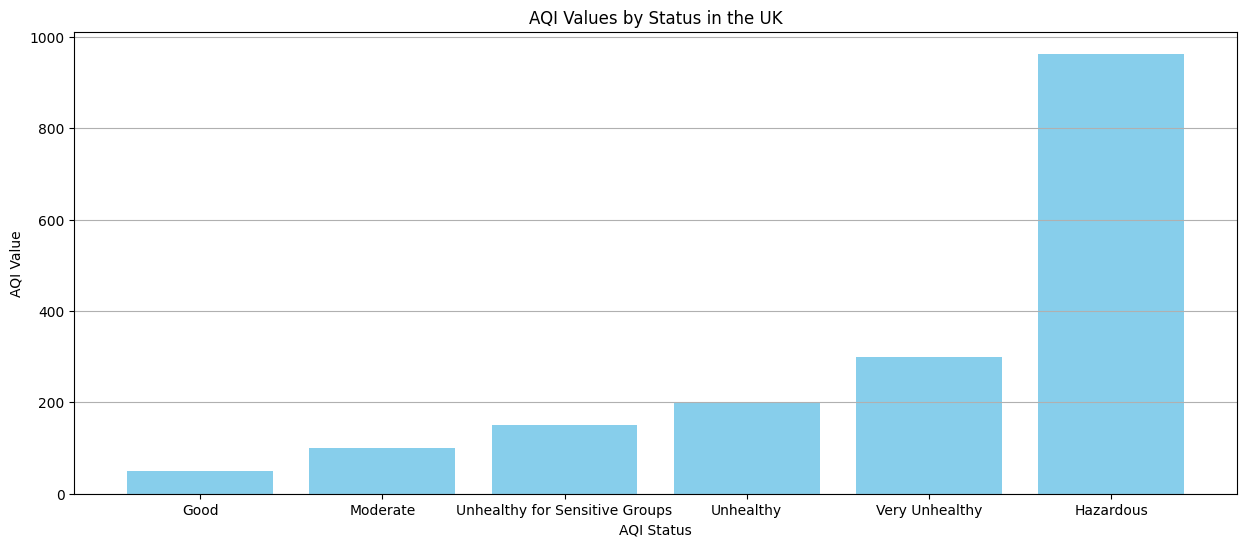

In [47]:
# Plotting AQI values by status
plt.figure(figsize=(15, 6))
plt.bar(df['Status'], df['AQI Value'], color='skyblue')

plt.title('AQI Values by Status in the UK')
plt.xlabel('AQI Status')
plt.ylabel('AQI Value')
plt.grid(True, axis='y')
plt.show()

UK and Northern Ireland may have a problem of air pollution

## Dates Vs AQI

In [48]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['AQI Value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

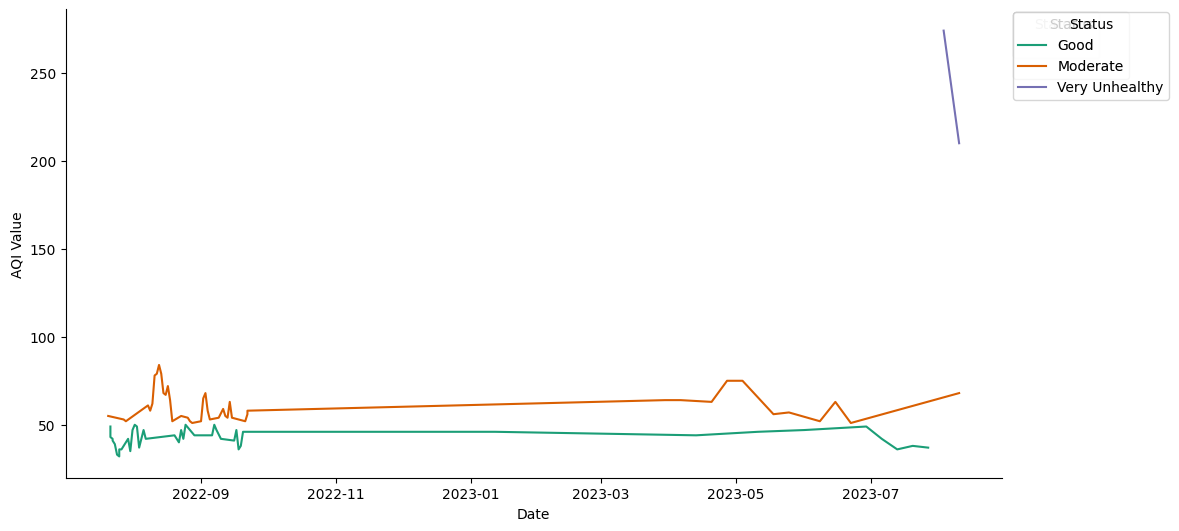

In [49]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = AQI.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('AQI Value')

We can see from the line that When AQI value increase the Severity also increased. And for moderate and good statuses were decently consistant over a span of one year.

## Air Quality Vs Severity Level

In [50]:
cancer['Air Pollution'].unique()

array([2, 3, 4, 7, 6, 5, 1, 8])

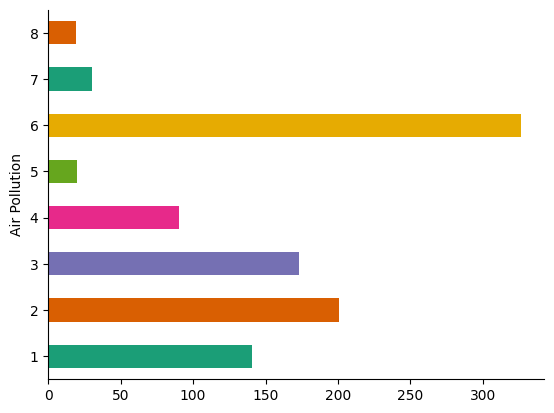

In [51]:
cancer.groupby('Air Pollution').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [52]:
cancer['Gender'].unique()

array([1, 2])

From the AQI dataset we can say that AQI is in 3 parts


1.   Good
2.   Moderate
3. Very Unhealthy

and from cancer dataset we can see they distribute from 1-8, let's add the values to the cancer dataset.

So we are considering 1,2,3 as Good,
4,5,6 as Moderate &
7, 8 as Very Unhealthy

and in the cancer dataset
1 for Male, 2 Female, and 0 for People



In [53]:
def categorize_pollution(level):
  if level in [1, 2, 3]:
    return 'Good'
  elif level in [4, 5]:
    return 'Moderate'
  else:
    return 'Very Unhealthy'

cancer['Air Pollution'] = cancer['Air Pollution'].apply(categorize_pollution)

In [54]:
def categorize_gender(gender):
  if gender == 1:
    return 'Male'
  elif gender == 2:
    return 'Female'
  else:
    return 'People'

cancer['Gender'] = cancer['Gender'].apply(categorize_gender)

In [55]:
cancer.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,Male,Good,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,Male,Good,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,Male,Moderate,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,Male,Very Unhealthy,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,Male,Very Unhealthy,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


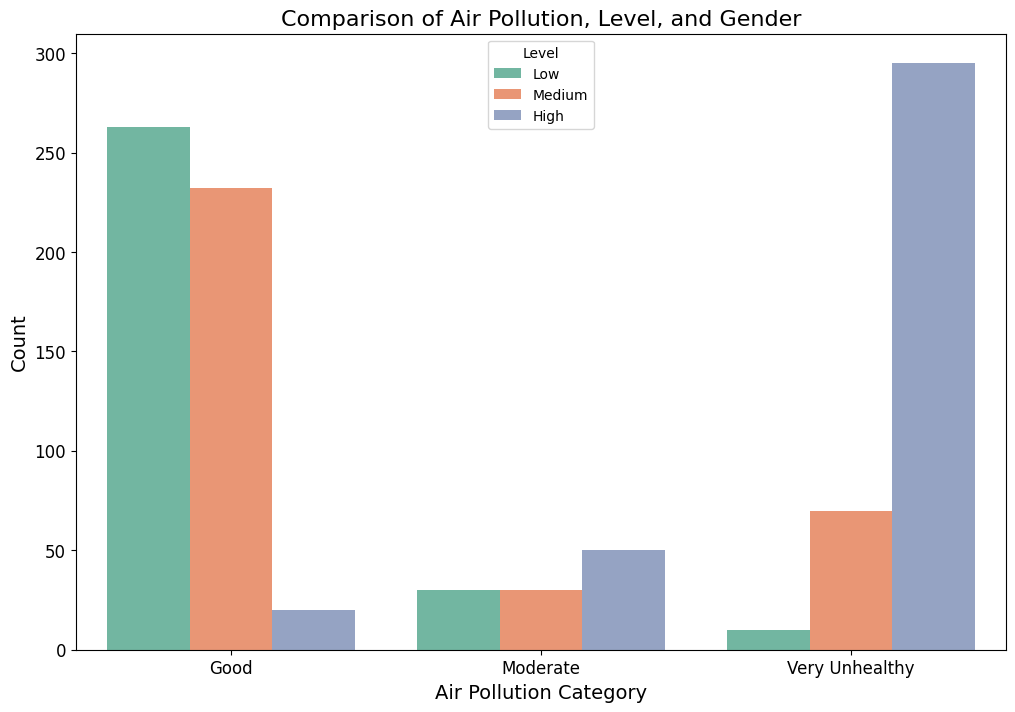

In [56]:
plt.figure(figsize=(12, 8))

sns.countplot(data= cancer,
              x='Air Pollution',  # Categories for Air Pollution (Low, Medium, High)
              hue='Level',  # Level (e.g., Low, Medium, High)
              palette='Set2')  # Color palette for better visualization

# Title and labels
plt.title("Comparison of Air Pollution, Level, and Gender", fontsize=16)
plt.xlabel("Air Pollution Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

United kingdom in overall has a problem of lung cancer from Air pollution

Finally, a strong correlation was observed between high smoking levels, elevated AQI, and increased severity of lung cancer in UK and also globally.

# Conclusion


In conclusion, this study explores the significant relationship between air pollution, a high Air Quality Index (AQI), and lung cancer mortality rates both globally and in the UK. By building on existing research, the analysis identifies and confirms additional contributing factors, such as the effect of smoking on lung cancer severity, thereby enhancing our understanding of the broader environmental impacts on public health. The findings highlight the need for improved air quality and public health policies to reduce lung cancer mortality associated with poor air quality in the UK.

# The End

**Special Thanks to**

1. Authors of the paper:
  - [Refat Khan Pathan](https://pubmed.ncbi.nlm.nih.gov/?term=%22Pathan%20RK%22%5BAuthor%5D)
  - [Israt Jahan Shorna](https://pubmed.ncbi.nlm.nih.gov/?term=%22Shorna%20IJ%22%5BAuthor%5D)
  - [Md Sayem Hossain](https://pubmed.ncbi.nlm.nih.gov/?term=%22Hossain%20MS%22%5BAuthor%5D)
  - [Mayeen Uddin Khandaker](https://pubmed.ncbi.nlm.nih.gov/?term=%22Khandaker%20MU%22%5BAuthor%5D)
  - [Huda I Almohammed](https://pubmed.ncbi.nlm.nih.gov/?term=%22Almohammed%20HI%22%5BAuthor%5D)
  - [Zuhal Y Hamd](https://pubmed.ncbi.nlm.nih.gov/?term=%22Hamd%20ZY%22%5BAuthor%5D)

2. [NHS (National Health Service) in the UK](https://digital.nhs.uk/)
  - [NHS UK Home](https://www.nhs.uk/)
  - [NHS UK Health A-Z](https://www.nhs.uk/conditions/)
  - [NHS UK Services](https://www.nhs.uk/service-search)




**Go Billiken**

<img src="https://www.slu.edu/marcom/tools-downloads/-img/billiken/slu-billiken-rgb.png" width="100" height="100">